In [9]:
import tensorflow as tf 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import random 
import shutil
from keras.preprocessing import image

In [3]:
print(len(os.listdir('C:/Users/hp/Desktop/X_ray Dataset/Train/normal')))
print(len(os.listdir('C:/Users/hp/Desktop/X_ray Dataset/Train/opacity')))

1082
3110


In [4]:
print(len(os.listdir('C:/Users/hp/Desktop/X_ray Dataset/Test/normal')))
print(len(os.listdir('C:/Users/hp/Desktop/X_ray Dataset/Test/opacity')))

234
390


In [5]:
print(len(os.listdir('C:/Users/hp/Desktop/X_ray Dataset/Val/normal')))
print(len(os.listdir('C:/Users/hp/Desktop/X_ray Dataset/Val/opacity')))

267
773


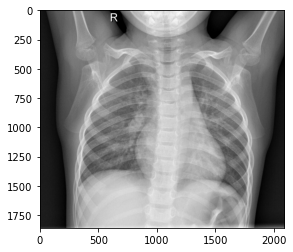

In [10]:
DATADIR = r"C:/Users/hp/Desktop/X_ray Dataset/Train"
CATEGORIES = ['normal','opacity']
#Visualising malignant thyriod
path = os.path.join(DATADIR,'normal')
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

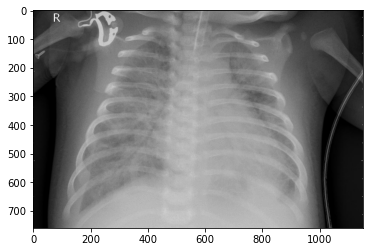

In [11]:
path = os.path.join(DATADIR,'opacity')
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy']
             )

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = 'C:/Users/hp/Desktop/X_ray Dataset/Train/'
VALIDATION_DIR = 'C:/Users/hp/Desktop/X_ray Dataset/Val/'
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(150,150),
                                                   batch_size=131,
                                                   class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             batch_size=104,
                                                             class_mode='binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                             target_size=(150,150),
                                                             batch_size=104,
                                                             class_mode='binary')

In [11]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=10,
    steps_per_epoch= 32,
    validation_steps=10,
    verbose=1 
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32 steps, validate for 10 steps
Epoch 1/10
32/32 [==============================] - 159s 5s/step - loss: 0.4748 - accuracy: 0.8690 - val_loss: 0.1827 - val_accuracy: 0.9462
Epoch 2/10
32/32 [==============================] - 138s 4s/step - loss: 0.2432 - accuracy: 0.9213 - val_loss: 0.2356 - val_accuracy: 0.8865
Epoch 3/10
32/32 [==============================] - 143s 4s/step - loss: 0.1620 - accuracy: 0.9396 - val_loss: 0.0989 - val_accuracy: 0.9644
Epoch 4/10
32/32 [==============================] - 139s 4s/step - loss: 0.1348 - accuracy: 0.9504 - val_loss: 0.1549 - val_accuracy: 0.9375
Epoch 5/10
32/32 [==============================] - 137s 4s/step - loss: 0.1153 - accuracy: 0.9573 - val_loss: 0.0895 - val_accuracy: 0.9673
Epoch 6/10
32/32 [==============================] - 137s 4s/step - loss: 0.0983 - accuracy: 0.9668 - val_loss: 0.1008 - val_accuracy: 0.9635
Epoch 7/10
32/32 [==============================] - 136s 4s/st

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

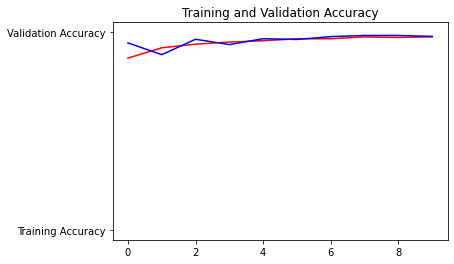

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc,'r','Training Accuracy')
plt.plot(epochs, val_acc,'b','Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

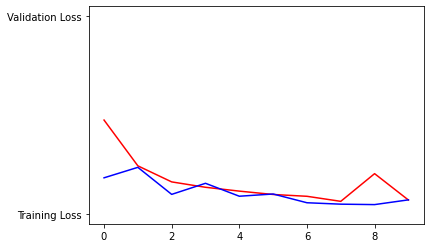

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(epochs, loss,'r', 'Training Loss')
plt.plot(epochs, val_loss,'b', 'Validation Loss')
plt.figure()

In [15]:
TEST_DIR = 'C:/Users/hp/Desktop/X_ray Dataset/Test/'

In [27]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                             target_size=(150,150),
                                                             batch_size=624,
                                                             class_mode='binary')
test_labels = []
for i in range(0,1):
    test_labels.extend(np.array(test_generator[i][1]))

Found 624 images belonging to 2 classes.


In [25]:
print(len(test_labels))

624


In [32]:
test_generator

In [34]:
#test_labels = int(test_labels)

In [33]:
score = model.evaluate(test_generator,verbose=1)
print('Testscore:', score[0])
print('Test accuracy:', score[1])

  ...
    to  
  ['...']
1/1 [==============================] - 11s 11s/step - loss: 1.0158 - accuracy: 0.7772
Testscore: 1.015836477279663
Test accuracy: 0.7772436
